# Demo of DST and DCT transform types and their associated basis functions

The Discrete Fourier Transform (DFT) is a unitary transform between nodal values of a periodic function and coefficients of a finite Fourier series. Importantly, the transform is unitary, so that nodal values and Fourier coefficients are *equivalent specifications of a discrete function*.

For non-periodic functions, we can use the Discrete Sine and Cosine Transforms (DST, DCT).
Whereas the Discrete Fourier Transform (DFT) is uniquely defined, there are 4 different versions of the DST and DCT, called DST-I through DST-IV, and DCT-I through DCI-IV, respectively. The transforms are available in `scipy.fft.dct` and `scipy.fft.dst`.

DST-I and DST-II describe functions with homogenous Dirichlet boundary conditions, while DCT-I and DCT-II describe functions with homogenous von Neumann boundary conditions. DST-I and DCT-I have nodal values on a uniform grid, while DST-II and DCT-II have nodal values in the middle of the intervals between the uniform grid. DCT-I includes the endpoints.

DST-III, DST-IV, DCT-III, and DCT-IV have mixed boundary conditions: DST-III have Dirichlet conditions on the left, and von Neumann on the right, whule DCT-III is the same, but with opposite conditions. These two transforms are really mirror images of each other (as far as I can tell). Their nodal values are on the grid. At the von Neumann condition, the grid point is included, while at the Dirichlet point, it is excluded.

DST-IV and DCT-IV have the same boundary conditions as DST-III and DCT-III, but the nodal values are now in the middle of the intervals, and hence both endpoints are missing.

When differentiating a DST-I and II and IV series, one gets a DCT-I and II and IV series, respectively, and vice versa. This is not true for DST-III and DCT-III.

In this notebook, we demonstrate the nodal grids and the basis functions for each transform.


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst, idst, dct, idct



## DST-I

The grid points are plotted as black circles, and the endpoints (which are not included in the grid for DST-I) are marked as vertical bars. The nodal values of the sine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


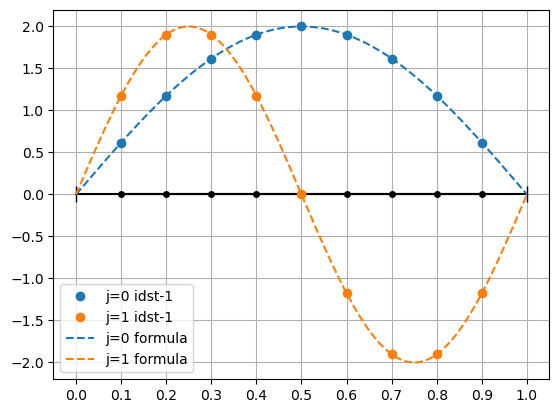

In [101]:

x_max = 1
N = 9

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+2)
x = x_all[1:-1]
f = np.arange(1, N+1) * np.pi / x_max
x_fine = np.linspace(0, x_max, 1000)

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idst(kronecker_delta(0), type=1)
y1 = idst(kronecker_delta(1), type=1)
u0 = 2 * np.sin(f[0]*x_fine)
u1 = 2 * np.sin(f[1]*x_fine)


def plots(label='idst-1'):
    # Plot grid and basis functions
    plt.figure()
    plt.plot(x, 0*x, 'o-', color='k', markersize=4)
    plt.plot([0,x_max], [0,0], '-', color='k')
    plt.plot(0,0, '|', color='k', markersize=12)
    plt.plot(x_max,0, '|', color='k', markersize=12)
    plt.plot(x, y0, color='C0', linestyle='', marker='o', label=f'j=0 {label}')
    plt.plot(x, y1, color='C1', linestyle='', marker='o', label=f'j=1 {label}')
    plt.plot(x_fine, u0, color='C0', linestyle='--', label='j=0 formula')
    plt.plot(x_fine, u1, color='C1', linestyle='--', label='j=1 formula')
    #plt.plot(x, np.sin(f[1]*x), marker='s', label='k=2')
    plt.xticks(x_all)
    plt.grid()
    plt.legend()
    
plots(label='idst-1')


## DST-II

The grid points are plotted as black circles, and the endpoints (which are not included in the grid for DST-I) are marked as vertical bars. Note here the grid spacing at the left and right endpoints. The nodal values of the sine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


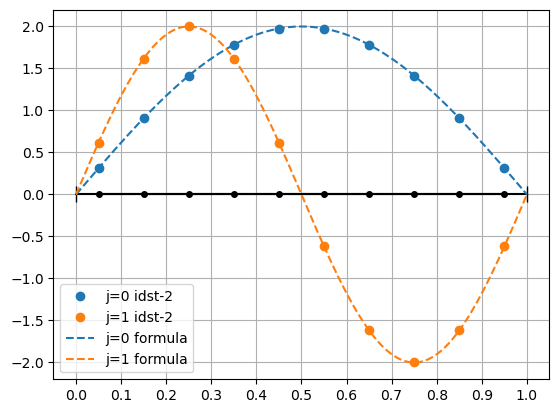

In [123]:

x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[:-1] + (x_all[1] - x_all[0])/2
f = np.arange(1, N+1) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idst(kronecker_delta(0), type=2)
y1 = idst(kronecker_delta(1), type=2)
u0 = 2 * np.sin(f[0]*x_fine)
u1 = 2 * np.sin(f[1]*x_fine)


plots(label='idst-2')

## DST-III

The grid points are plotted as black circles, and the endpoints  are marked as vertical bars. Note here that the right endpoint is included, and we have von Neumann conditions here, while the left endpoint is not included.The nodal values of the sine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


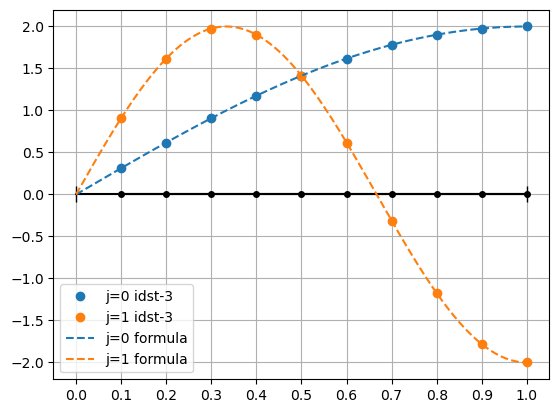

In [125]:
x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[1:]
f = np.arange(1/2, N+1/2) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idst(kronecker_delta(0), type=3)
y1 = idst(kronecker_delta(1), type=3)
u0 = 2 * np.sin(f[0]*x_fine)
u1 = 2 * np.sin(f[1]*x_fine)

plots(label='idst-3')

## DST-IV

The grid points are plotted as black circles, and the endpoints are marked as vertical bars. Note here that the end points are not included, and note also the spacing from the boundaries of the domain. The nodal values of the sine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


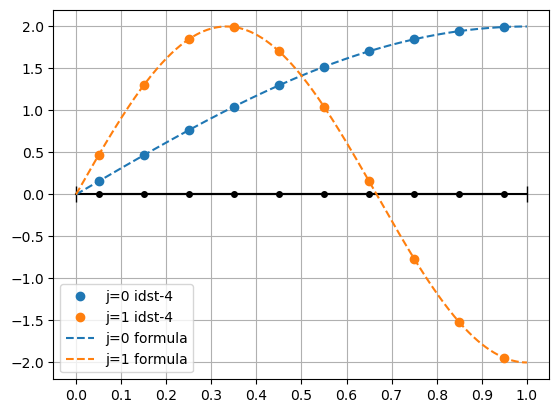

In [126]:
x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[:-1] + (x_all[1] - x_all[0])/2
f = np.arange(1/2, N+1/2) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idst(kronecker_delta(0), type=4)
y1 = idst(kronecker_delta(1), type=4)
u0 = 2 * np.sin(f[0]*x_fine)
u1 = 2 * np.sin(f[1]*x_fine)

# Plot grid and basis functions
plots(label='idst-4')

## DCT-I

The grid points are plotted as black circles, and the endpoints (which are included in the grid for DCT-I) are marked as vertical bars. The nodal values of the cosine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


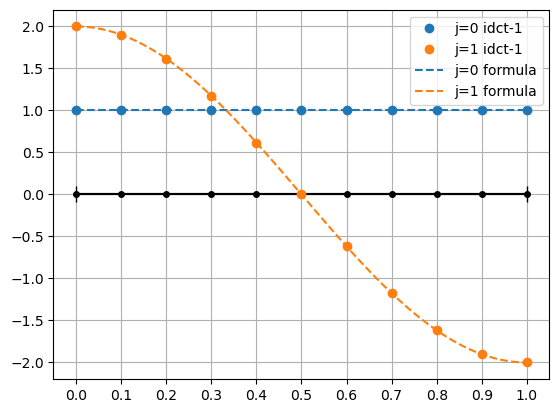

In [129]:

x_max = 1
N = 11

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N)
x = x_all
f = np.arange(0, N) * np.pi / x_max


# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idct(kronecker_delta(0), type=1)
y1 = idct(kronecker_delta(1), type=1)
u0 = 1 * np.cos(f[0]*x_fine)
u1 = 2 * np.cos(f[1]*x_fine)

plots(label='idct-1')

## DCT-II

The grid points are plotted as black circles, and the endpoints (which are not included in the grid for DCT-I) are marked as vertical bars. Note here the grid spacing at the left and right endpoints. The nodal values of the cosine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


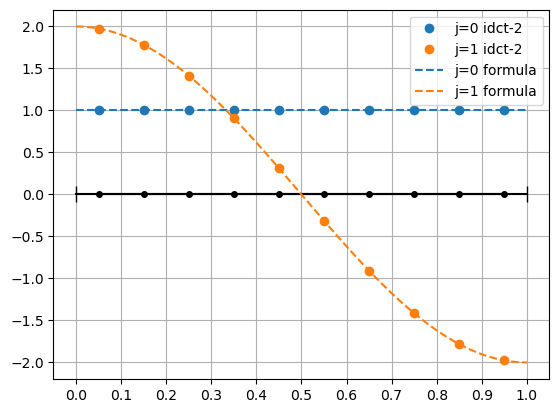

In [130]:

x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[:-1] + (x_all[1] - x_all[0])/2
f = np.arange(0, N) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idct(kronecker_delta(0), type=2)
y1 = idct(kronecker_delta(1), type=2)
u0 = 1 * np.cos(f[0]*x_fine)
u1 = 2 * np.cos(f[1]*x_fine)

plots(label='idct-2')

## DCT-III

The grid points are plotted as black circles, and the endpoints  are marked as vertical bars. Note here that the left endpoint is included, and we have von Neumann conditions here, while the right endpoint is not included. The nodal values of the cosine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.

DCT-III and DST-III are mirror images of each other, but are not mapped onto each other by differentiation: The boundary conditions are swapped, but not the grid.


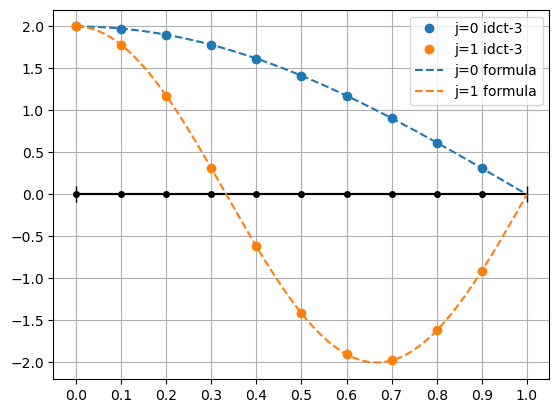

In [131]:

x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[:-1]
f = np.arange(1/2, N+1/2) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idct(kronecker_delta(0), type=3)
y1 = idct(kronecker_delta(1), type=3)
u0 = 2 * np.cos(f[0]*x_fine)
u1 = 2 * np.cos(f[1]*x_fine)

plots(label='idct-3')

## DCT-IV

The grid points are plotted as black circles, and the endpoints are marked as vertical bars. Note here that the end points are not included, and note also the spacing from the boundaries of the domain. The nodal values of the cosine basis functions are plotted as circles, while the whole basis function interpolated on the computational interval is shown as a dashed line.


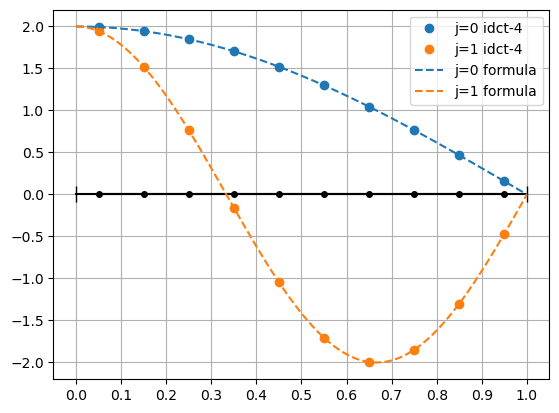

In [132]:
x_max = 1
N = 10

# Set up space grid and wave numbers
x_all = np.linspace(0, x_max, N+1)
x = x_all[:-1] + (x_all[1] - x_all[0])/2
f = np.arange(1/2, N+1/2) * np.pi / x_max

# Compute basis functions
kronecker_delta = lambda j: np.array([1 if i==j else 0 for i in range(N)])
y0 = idct(kronecker_delta(0), type=4)
y1 = idct(kronecker_delta(1), type=4)
u0 = 2 * np.cos(f[0]*x_fine)
u1 = 2 * np.cos(f[1]*x_fine)

plots(label='idct-4')